# Problem Statement


telco data, expected churn rate

classification on retention, clustering of customer behaviour

customer retention program  and the focus 


# Background

Attrition model

innovation reshaping communication

# Data Import

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv
telco = pd.read_csv('../data/telco_churn_data')

#set display max 100
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [3]:
#drop lat_long as longitude and latitude col is present
#drop country and states as all data from same location
#drop quarter as all data is in Q3
#drop customer ID 

telco = telco.drop(columns=['country','state','lat_long', 'quarter','customer_id'])

In [4]:
telco.head()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,city,zip_code,latitude,longitude,partner,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_label,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,device_protection_plan,premium_tech_support,streaming_music,unlimited_data,monthly_charge,total_charges_y,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_category,population
0,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.02381,-118.156582,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,1,100,5433,Competitor offered more data,No,0,1,None,0.00,DSL,8,Yes,No,No,No,39.65,39.65,0.0,20,0.00,59.65,3,Churned,Competitor,68701
1,Male,39,No,No,Yes,No,0,Los Angeles,90022,34.02381,-118.156582,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),No,0,42,4658,NaN,Yes,5,72,None,42.55,DSL,18,Yes,Yes,No,Yes,72.10,5016.65,0.0,0,3063.60,8080.25,3,Stayed,NaN,68701
2,Female,32,No,No,No,No,0,Los Angeles,90022,34.02381,-118.156582,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,No,0,34,3503,NaN,No,0,1,None,7.11,Fiber Optic,26,Yes,No,No,Yes,75.55,75.55,0.0,0,7.11,82.66,5,Joined,NaN,68701
3,Male,35,No,No,Yes,Yes,3,Los Angeles,90022,34.02381,-118.156582,Yes,66,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),No,0,46,5748,NaN,Yes,4,66,None,0.00,Cable,25,Yes,No,Yes,Yes,56.75,3708.40,0.0,0,0.00,3708.40,3,Stayed,NaN,68701
4,Female,20,Yes,No,No,No,0,Los Angeles,90022,34.02381,-118.156582,No,7,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,No,0,38,5545,NaN,No,0,7,Offer E,36.49,Fiber Optic,42,No,No,Yes,Yes,94.05,633.45,0.0,0,255.43,888.88,3,Stayed,NaN,68701


In [5]:
#columns with Yes/No output to udpate to binary 
columns = ['under_30', 'senior_citizen', 'married', 'dependents','partner',
           'phone_service','paperless_billing','churn_label','referred_a_friend',
           'device_protection_plan','premium_tech_support','streaming_music',
            'unlimited_data','online_security','online_backup', 
           'device_protection','tech_support','streaming_tv','streaming_movies','multiple_lines']

#replacement of values
telco[columns] = telco[columns].replace({'No': 0, 'Yes': 1,'No internet service': 0, 'No phone service':0})
telco['gender'] = telco['gender'].replace({'Male': 0,'Female': 1})

#target value churned  = 1
telco['customer_status'] = telco['customer_status'].replace({'Churned': 1,'Stayed': 0, 'Joined':0})

#rename contract to num of months
telco['contract'] = telco['contract'].replace({'Month-to-month': 1, 'Two year': 24, 'One year':12})


In [6]:
#null in churn cat and churn reason
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   int64  
 1   age                                7043 non-null   int64  
 2   under_30                           7043 non-null   int64  
 3   senior_citizen                     7043 non-null   int64  
 4   married                            7043 non-null   int64  
 5   dependents                         7043 non-null   int64  
 6   number_of_dependents               7043 non-null   int64  
 7   city                               7043 non-null   object 
 8   zip_code                           7043 non-null   int64  
 9   latitude                           7043 non-null   float64
 10  longitude                          7043 non-null   float64
 11  partner                            7043 non-null   int64

In [7]:
# managing isnull values as N/A for churn_category and churn_reason
telco.churn_reason = telco.churn_reason.fillna('NA')
telco.churn_category = telco.churn_category.fillna('NA')

In [8]:
#minor rename of total charges for consistency
telco = telco.rename(columns={'total_charges_y':'total_charges'})

In [9]:
telco.head()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,city,zip_code,latitude,longitude,partner,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_label,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,device_protection_plan,premium_tech_support,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_category,population
0,0,78,0,1,0,0,0,Los Angeles,90022,34.02381,-118.156582,0,1,0,0,DSL,0,0,1,0,0,1,1,1,Electronic check,1,1,100,5433,Competitor offered more data,0,0,1,None,0.00,DSL,8,1,0,0,0,39.65,39.65,0.0,20,0.00,59.65,3,1,Competitor,68701
1,0,39,0,0,1,0,0,Los Angeles,90022,34.02381,-118.156582,1,72,1,1,DSL,1,1,1,1,0,0,24,0,Credit card (automatic),0,0,42,4658,NA,1,5,72,None,42.55,DSL,18,1,1,0,1,72.10,5016.65,0.0,0,3063.60,8080.25,3,0,NA,68701
2,1,32,0,0,0,0,0,Los Angeles,90022,34.02381,-118.156582,0,1,1,0,Fiber optic,0,0,1,0,0,0,1,0,Electronic check,0,0,34,3503,NA,0,0,1,None,7.11,Fiber Optic,26,1,0,0,1,75.55,75.55,0.0,0,7.11,82.66,5,0,NA,68701
3,0,35,0,0,1,1,3,Los Angeles,90022,34.02381,-118.156582,1,66,0,0,DSL,0,1,1,0,1,1,24,1,Credit card (automatic),0,0,46,5748,NA,1,4,66,None,0.00,Cable,25,1,0,1,1,56.75,3708.40,0.0,0,0.00,3708.40,3,0,NA,68701
4,1,20,1,0,0,0,0,Los Angeles,90022,34.02381,-118.156582,0,7,1,0,Fiber optic,0,1,0,0,1,1,12,1,Mailed check,0,0,38,5545,NA,0,0,7,Offer E,36.49,Fiber Optic,42,0,0,1,1,94.05,633.45,0.0,0,255.43,888.88,3,0,NA,68701


In [10]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   int64  
 1   age                                7043 non-null   int64  
 2   under_30                           7043 non-null   int64  
 3   senior_citizen                     7043 non-null   int64  
 4   married                            7043 non-null   int64  
 5   dependents                         7043 non-null   int64  
 6   number_of_dependents               7043 non-null   int64  
 7   city                               7043 non-null   object 
 8   zip_code                           7043 non-null   int64  
 9   latitude                           7043 non-null   float64
 10  longitude                          7043 non-null   float64
 11  partner                            7043 non-null   int64

## Numerical

In [11]:
telco.customer_status.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: customer_status, dtype: float64

In [12]:
#group numerical columns 
num_tel = telco.select_dtypes(include='number')
#group columns by customer status ( 1: Churn or 0: Stayed ) 
num_tel = num_tel.groupby(by='customer_status').agg('mean')
num_tel

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,zip_code,latitude,longitude,partner,tenure_months,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,churn_label,churn_value,churn_score,cltv,referred_a_friend,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,device_protection_plan,premium_tech_support,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,population
customer_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.492656,45.344414,0.212022,0.128721,0.528218,0.293970,0.595284,93518.212215,36.287436,-119.804838,0.528218,37.569965,0.901044,0.409934,0.333204,0.368380,0.362775,0.335137,0.365868,0.369927,11.100116,0.535562,0.0,0.0,50.098183,4490.921337,0.502126,2.468690,37.591225,22.883572,19.915733,0.362775,0.335137,0.340162,0.626788,61.265124,2550.792103,2.122279,6.752996,862.952107,3418.374927,3.789911,21190.675686
1,0.502408,49.735688,0.162654,0.254682,0.357945,0.056715,0.118245,93532.352595,36.268614,-119.782388,0.357945,17.979133,0.909042,0.454789,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,2.567683,0.749064,1.0,1.0,82.510433,4149.414660,0.333868,0.521134,17.979133,23.167635,22.175495,0.291600,0.165864,0.389513,0.803638,74.441332,1531.796094,1.518983,7.158909,433.917549,1971.353569,1.736223,21156.434992


In [13]:
#review binary cols
#forlooop
less_one = ['gender', 'under_30', 'senior_citizen', 'married', 'dependents',
       'number_of_dependents', 'partner', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'referred_a_friend',
       'device_protection_plan', 'premium_tech_support', 'streaming_music',
       'unlimited_data']

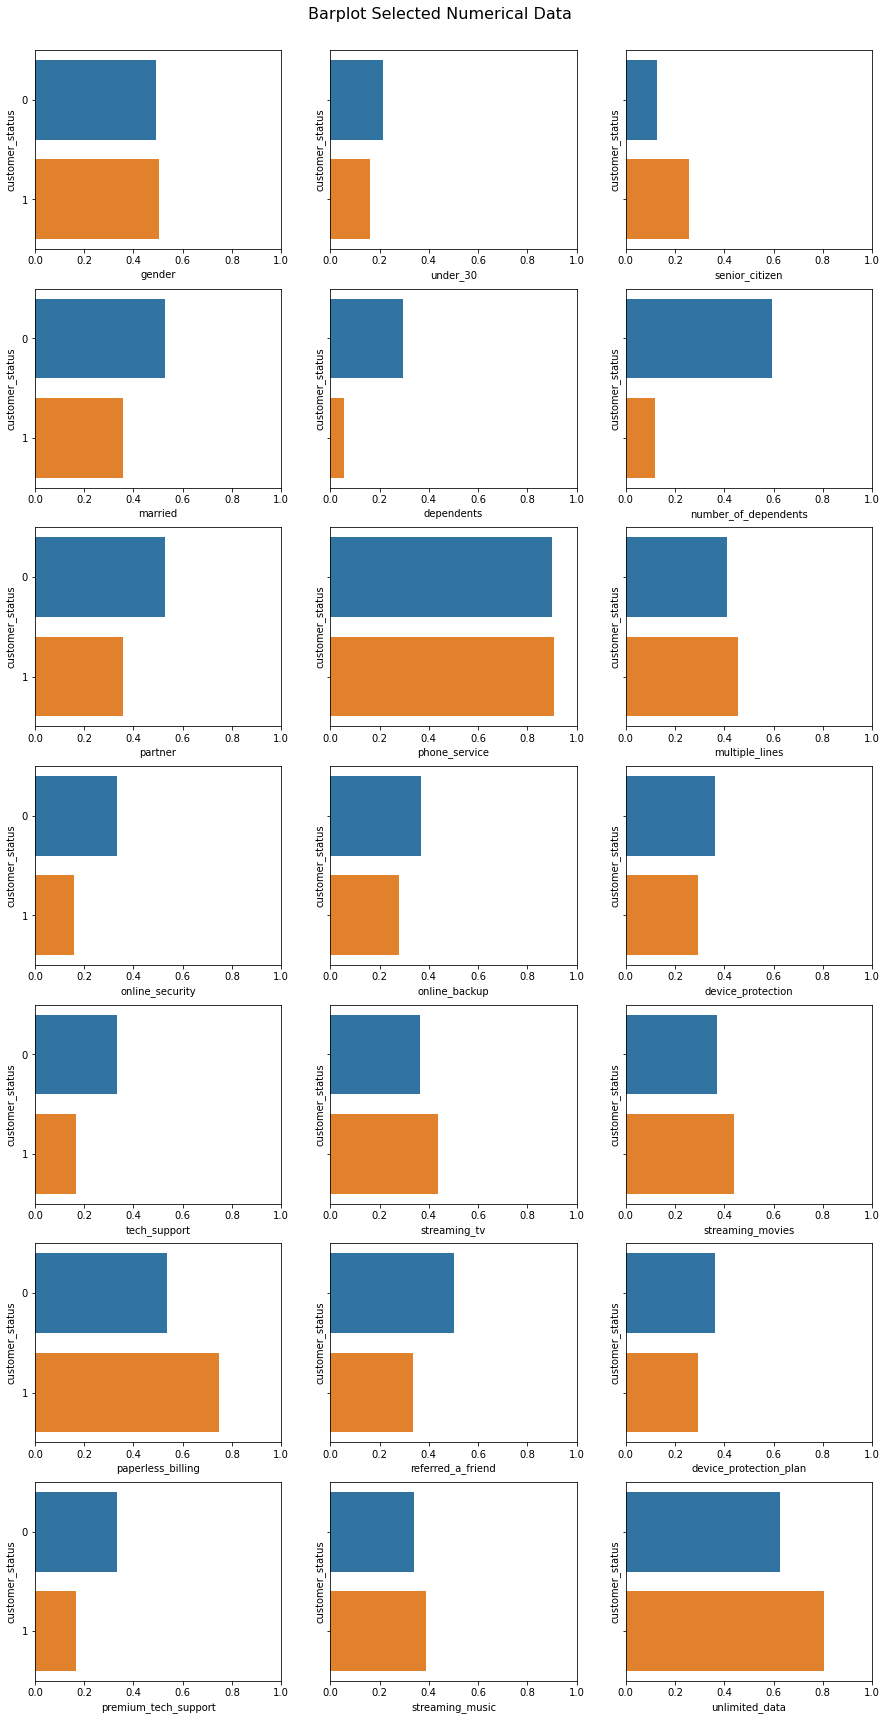

In [14]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(15,30), sharey=True)
ax = ax.flatten()

for idx, col in enumerate(less_one):
    sns.barplot(data=num_tel, y=num_tel.index, x=col, ax=ax[idx], orient='h',)
    ax[idx].set_xlim(xmin=0.0, xmax=1.0)

plt.suptitle(t='Barplot Selected Numerical Data',x=0.5, y = .9, fontsize=16);
# plt.savefig('../images/barplot_numerical')
plt.show()

### Chi Squared Test 

#### Above 1

In [16]:
#numerical cols larger than 1.0
more_one = num_tel.columns[~num_tel.columns.isin(less_one)]
more_one = more_one.drop(['zip_code','latitude', 'longitude','churn_label', 'churn_value','population'])

In [17]:
more_one

Index(['age', 'tenure_months', 'contract', 'churn_score', 'cltv',
       'number_of_referrals', 'tenure_in_months',
       'avg_monthly_long_distance_charges', 'avg_monthly_gb_download',
       'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'satisfaction_score'],
      dtype='object')

In [18]:
telco.head()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,city,zip_code,latitude,longitude,partner,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_label,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,device_protection_plan,premium_tech_support,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_category,population
0,0,78,0,1,0,0,0,Los Angeles,90022,34.02381,-118.156582,0,1,0,0,DSL,0,0,1,0,0,1,1,1,Electronic check,1,1,100,5433,Competitor offered more data,0,0,1,None,0.00,DSL,8,1,0,0,0,39.65,39.65,0.0,20,0.00,59.65,3,1,Competitor,68701
1,0,39,0,0,1,0,0,Los Angeles,90022,34.02381,-118.156582,1,72,1,1,DSL,1,1,1,1,0,0,24,0,Credit card (automatic),0,0,42,4658,NA,1,5,72,None,42.55,DSL,18,1,1,0,1,72.10,5016.65,0.0,0,3063.60,8080.25,3,0,NA,68701
2,1,32,0,0,0,0,0,Los Angeles,90022,34.02381,-118.156582,0,1,1,0,Fiber optic,0,0,1,0,0,0,1,0,Electronic check,0,0,34,3503,NA,0,0,1,None,7.11,Fiber Optic,26,1,0,0,1,75.55,75.55,0.0,0,7.11,82.66,5,0,NA,68701
3,0,35,0,0,1,1,3,Los Angeles,90022,34.02381,-118.156582,1,66,0,0,DSL,0,1,1,0,1,1,24,1,Credit card (automatic),0,0,46,5748,NA,1,4,66,None,0.00,Cable,25,1,0,1,1,56.75,3708.40,0.0,0,0.00,3708.40,3,0,NA,68701
4,1,20,1,0,0,0,0,Los Angeles,90022,34.02381,-118.156582,0,7,1,0,Fiber optic,0,1,0,0,1,1,12,1,Mailed check,0,0,38,5545,NA,0,0,7,Offer E,36.49,Fiber Optic,42,0,0,1,1,94.05,633.45,0.0,0,255.43,888.88,3,0,NA,68701


In [19]:
telco.describe()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,zip_code,latitude,longitude,partner,tenure_months,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,churn_label,churn_value,churn_score,cltv,referred_a_friend,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,device_protection_plan,premium_tech_support,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,46.509726,0.198921,0.162147,0.483033,0.231010,0.468692,93521.964646,36.282441,-119.798880,0.483033,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,8.835865,0.592219,0.265370,0.265370,58.699418,4400.295755,0.457476,1.951867,32.386767,22.958954,20.515405,0.343888,0.290217,0.353259,0.673719,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,21181.589238
std,0.500013,16.750352,0.399217,0.368612,0.499748,0.421508,0.962802,1865.794555,2.455723,2.157889,0.499748,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,9.551444,0.491457,0.441561,0.441561,21.525131,1183.057152,0.498224,3.001199,24.542061,15.448113,20.418940,0.475038,0.453895,0.478016,0.468885,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,20901.246553
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2003.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,11.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92102.000000,34.030915,-121.815412,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,3469.000000,0.000000,0.000000,9.000000,9.210000,3.000000,0.000000,0.000000,0.000000,0.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,2048.000000
50%,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93552.000000,36.391777,-119.730885,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,61.000000,4527.000000,0.000000,0.000000,29.000000,22.890000,17.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,15975.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,95351.000000,38.224869,-118.043237,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,75.000000,5380.500000,1.000000,3.000000,55.000000,36.395000,27.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,34146.000000
max,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,9.000000,96161.000000,41.962127,-114.192901,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,100.000000,6500.0000

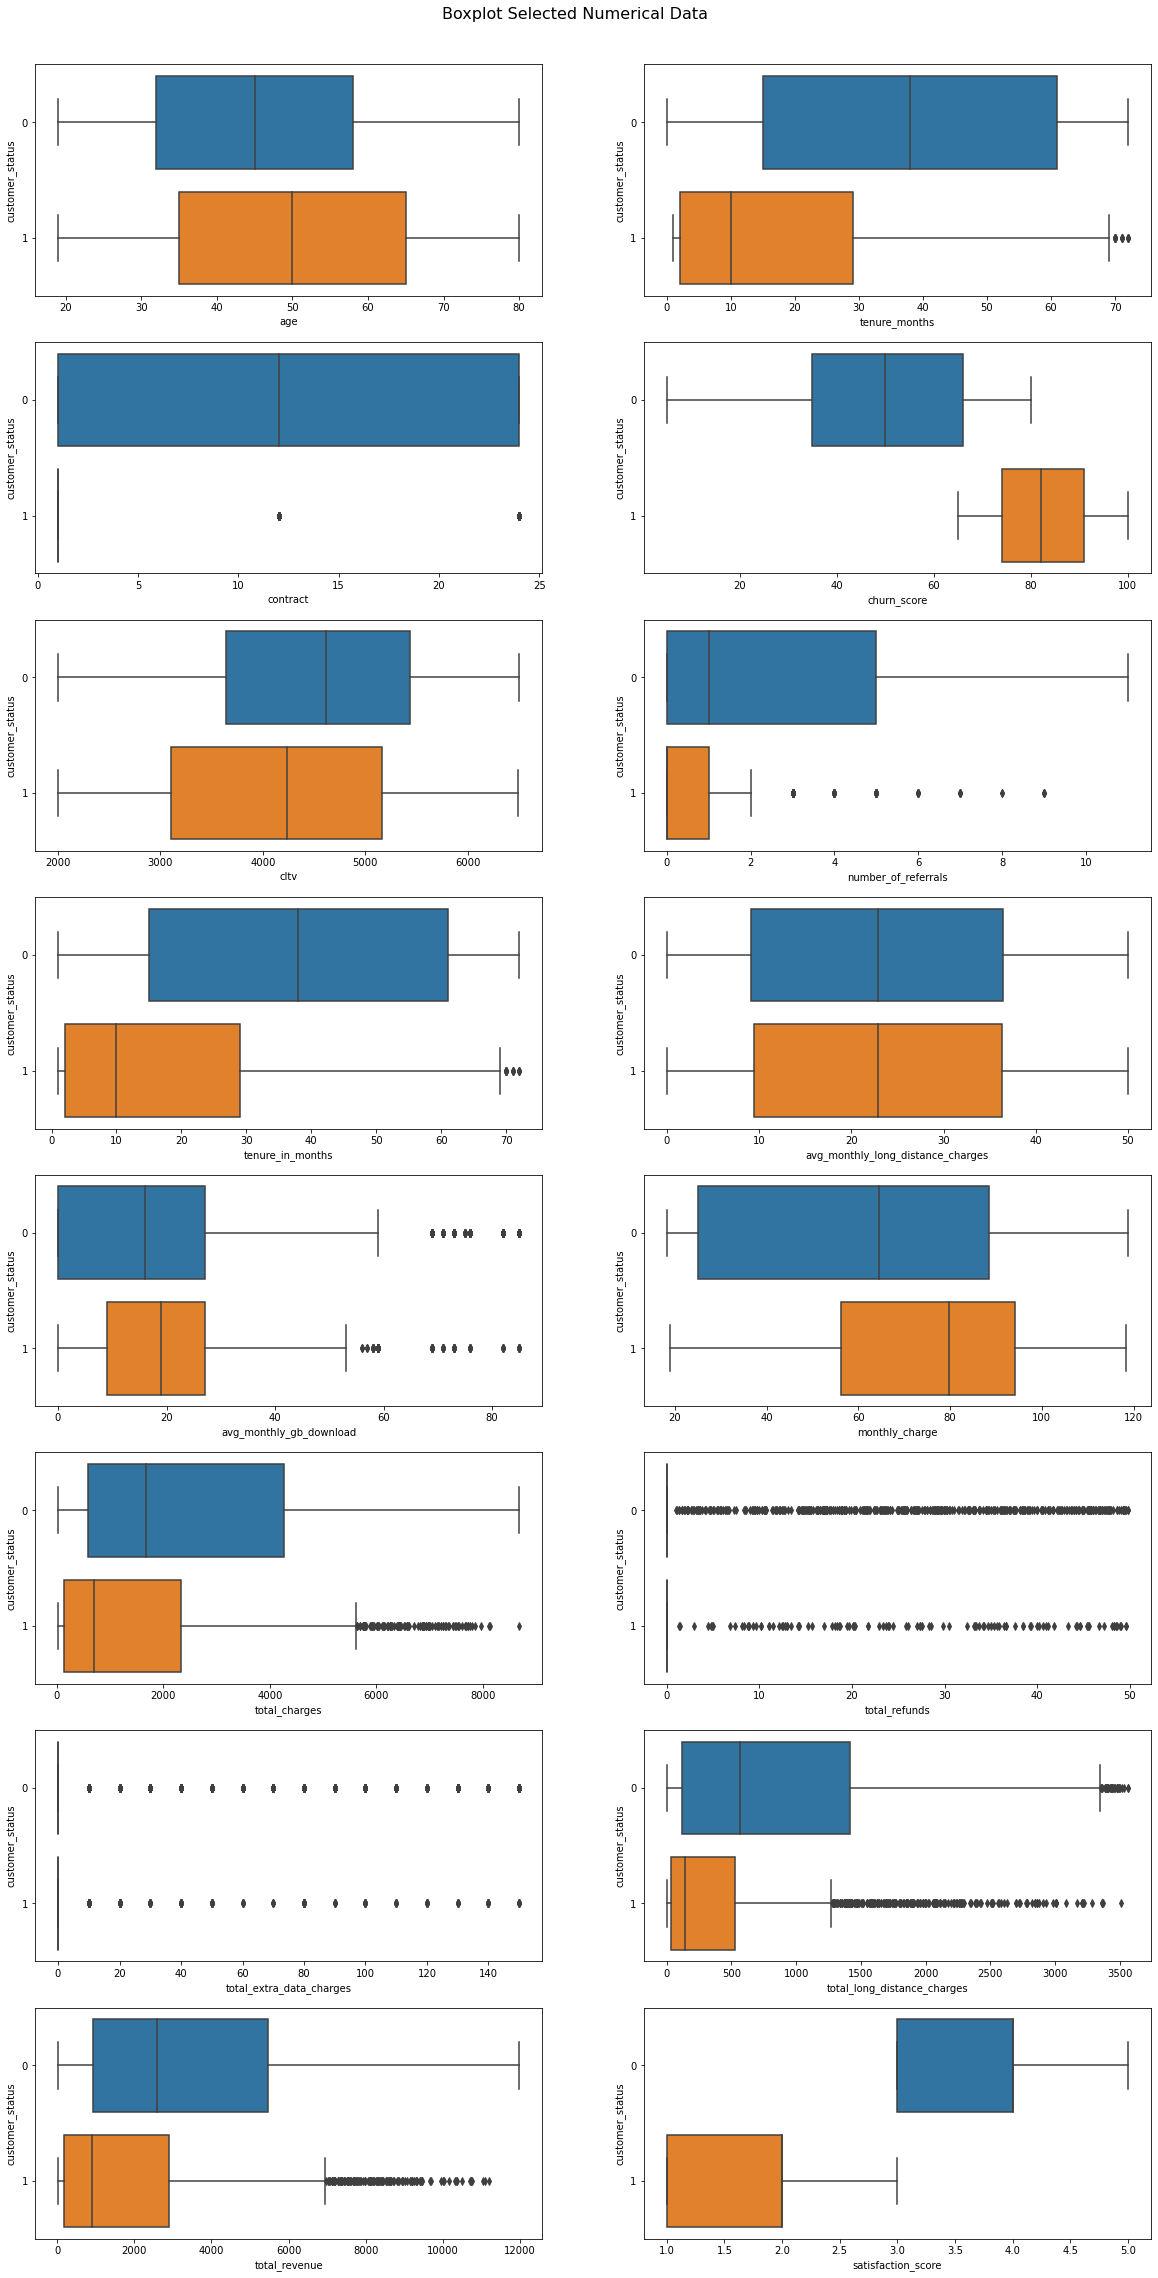

In [64]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(20,40))
ax = ax.flatten()

for idx, col in enumerate(more_one):
    sns.boxplot(data=telco, y=telco.customer_status, x=col, ax=ax[idx], orient='h')

plt.suptitle(t='Boxplot Selected Numerical Data',x=0.5, y = .9, fontsize=16);
# plt.savefig('../images/boxplot_numerical')
plt.show()

In [140]:
telco[(telco.customer_status == 1) & (telco.senior_citizen == 1)]['churn_reason'].value_counts()

Competitor offered higher download speeds    49
Competitor made better offer                 48
Attitude of support person                   42
Attitude of service provider                 38
Competitor offered more data                 37
Price too high                               34
Don't know                                   31
Competitor had better devices                31
Product dissatisfaction                      28
Network reliability                          25
Service dissatisfaction                      20
Extra data charges                           19
Lack of self-service on Website              17
Limited range of services                    16
Long distance charges                        12
Lack of affordable download/upload speed     11
Moved                                         8
Poor expertise of online support              5
Poor expertise of phone support               3
Deceased                                      2
Name: churn_reason, dtype: int64

In [138]:
telco[(telco.customer_status == 1) & (telco.paperless_billing == 1)]['churn_reason'].value_counts()

Competitor offered higher download speeds    144
Attitude of support person                   142
Competitor offered more data                 124
Don't know                                   114
Competitor made better offer                 105
Attitude of service provider                 103
Competitor had better devices                 95
Network reliability                           75
Product dissatisfaction                       74
Price too high                                73
Service dissatisfaction                       71
Lack of self-service on Website               70
Extra data charges                            43
Lack of affordable download/upload speed      35
Moved                                         34
Limited range of services                     33
Long distance charges                         29
Poor expertise of phone support               16
Poor expertise of online support              16
Deceased                                       4
Name: churn_reason, 

### Category

In [106]:
#group categorical columns 
cat_tel = telco.select_dtypes(exclude='number')
#group columns by customer status ( 1: Churn or 0: Stayed ) 
#drop churn statuses and city (too many)
cat_tel = cat_tel.drop(columns=['churn_reason','churn_category', 'city'])

In [150]:
cat_tel

,internet_service,payment_method,offer,internet_type
0,DSL,Electronic check,None,DSL
1,DSL,Credit card (automatic),None,DSL
2,Fiber optic,Electronic check,None,Fiber Optic
3,DSL,Credit card (automatic),None,Cable
4,Fiber optic,Mailed check,Offer E,Fiber Optic
...,...,...,...,...
7038,No,Credit card (automatic),Offer A,None
7039,No,Mailed check,Offer E,None
7040,DSL,Credit card (automatic),Offer E,Cable
7041,No,Mailed check,None,None


<AxesSubplot:xlabel='internet_service-internet_type', ylabel='offer-payment_method'>

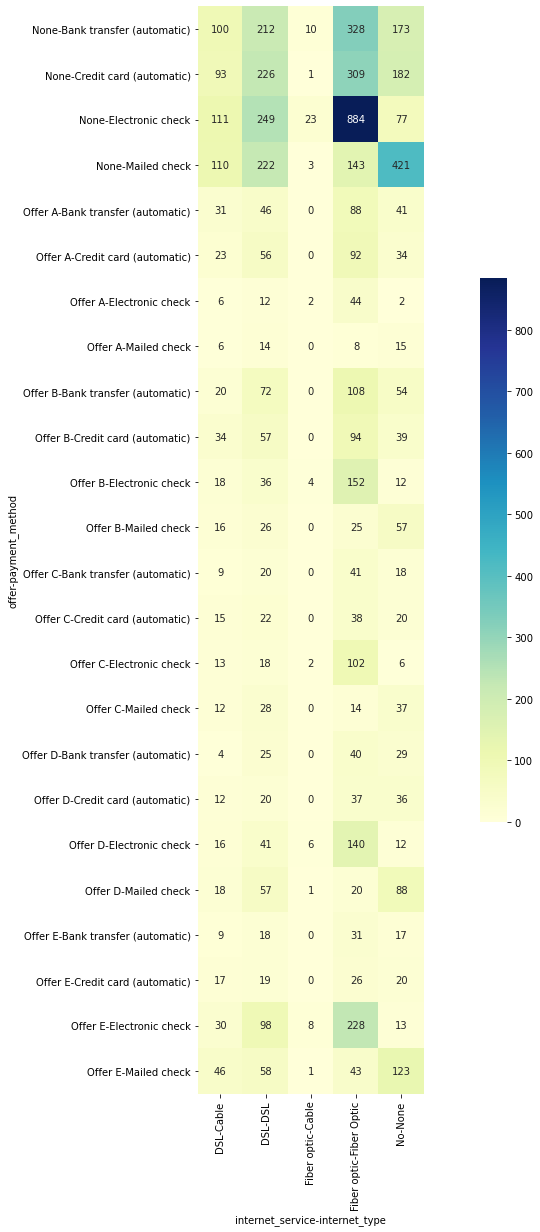

In [168]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.crosstab(index=(cat_tel['offer'], cat_tel['payment_method']),
                    columns=(cat_tel['internet_service'], cat_tel['internet_type'])),
            annot=True,
            square=True, 
            fmt='d',
            cmap="YlGnBu",cbar_kws={'shrink':0.5})
                                   

<AxesSubplot:xlabel='All', ylabel='customer_status'>

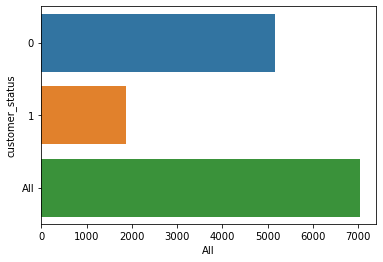

In [62]:
data = pd.crosstab(index=telco['customer_status'],
                columns=cat_tel['city'], margins=True)
data
sns.barplot(data=data, x=data.All,y=data.index,)

### Category - city, internet service, payment method, churn reason, offer, internet type,customer status, churn category

In [12]:
telco.internet_type.unique()

array(['DSL', 'Fiber Optic', 'Cable', 'None'], dtype=object)

In [13]:
telco.offer.unique()

array(['None', 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

In [14]:
telco.internet_service.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [15]:
telco.payment_method.unique()

array(['Electronic check', 'Credit card (automatic)', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

In [16]:
telco.customer_status.unique()

array(['Churned', 'Stayed', 'Joined'], dtype=object)

In [17]:
telco.zip_code.value_counts()

92173    5
92201    5
92057    5
90010    5
92061    5
        ..
95562    4
94080    4
93517    4
96123    4
95316    4
Name: zip_code, Length: 1652, dtype: int64

In [18]:
telco.city.value_counts()

Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Granite Bay        4
Morro Bay          4
Hughson            4
Keene              4
Washington         4
Name: city, Length: 1129, dtype: int64